In [1]:
!pip install linearmodels

In [2]:
import numpy as np
import seaborn as sns
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import numpy.linalg as LA
from numpy.linalg import inv
import pandas as pd
from pandas.plotting import autocorrelation_plot
from scipy.stats import chi2
from scipy.special import gamma
from scipy.stats import t as t_student
import xlrd
import openpyxl
!pip install linearmodels
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.api import VAR
from statsmodels.tools.tools import add_constant
from linearmodels.iv import IV2SLS
from linearmodels.panel import RandomEffects
from linearmodels.datasets import wage_panel
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from itertools import product
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [3]:
import yfinance as yf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

BANKING U.S.A

In [5]:
import pandas as pd
import yfinance as yf
from pandas.io.html import read_html
import json
import requests

DATA IMPORT

I take in consideration the first six U.S.A banks for capitalization ; JP Morgan,Goldman Sachs,Bank of america,Morgan Stanley and Charles Schwab Bank.
I use the Yahoo finace API in order to download directly the data from the web. 
We need the tickets of the stocks an also we have to define the period of time.
the code is:
data=yf.download("ticket", start='initial data',end='ending data' progress=False)

In [6]:
JPM_data= yf.download("JPM", start= '2000-09-09', end= '2022-09-09', progress= False)
GS_data= yf.download("GS", start= '2000-09-09', end= '2022-09-09', progress= False)
SCHW_data= yf.download("SCHW", start= '2000-09-09', end= '2022-09-09', progress= False)
WFC_data= yf.download("WFC", start= '2000-09-09', end= '2022-09-09', progress= False)
BAC_data= yf.download("BAC", start= '2000-09-09', end= '2022-09-09', progress= False)
MS_data= yf.download("MS", start= '2000-09-09', end= '2022-09-09', progress= False)

In ordert to display the data we use .head() that can be use with dataframe objects, if you want to display more or less lines you can add the number between brackets.
example: varibles.head(10) for the first ten lines.
The code for display the last lines(if you have dataframe) is .tail() and it works as .head()

In [7]:
JPM_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-08,56.875,58.3125,56.75,57.8125,30.285315,4496500
2000-09-11,57.500,58.3750,56.50,57.5000,30.121607,5219500
2000-09-12,57.750,57.9375,52.00,52.8125,27.666040,7314600


In [8]:
JPM_data.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-06,114.330002,114.750000,112.070000,113.739998,113.739998,9751900
2022-09-07,113.129997,116.110001,112.760002,115.900002,115.900002,10647900
2022-09-08,115.279999,118.790001,114.629997,118.599998,118.599998,11435000


I have imported also the SP500 to have a market benchmark

In [9]:
SP500_data= yf.download("^GSPC", start= '2000-09-09', end= '2022-09-09', progress= False)

In [10]:
SP500_data.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-08,1502.51001,1502.51001,1489.880005,1494.5,1494.5,961000000


If we want work with the return and log-return we need to extract the Close price of each stocks, we can select all the data using the pandas command .loc[:,['Name of the columns']]  .
if we want more than one data we can add the name of differetn columns.
example: .loc[:,['col 1','col 2]] 

In [11]:
SP500=SP500_data.loc[:,['Close']]
JPM=JPM_data.loc[:,['Close']]
SCHW=SCHW_data.loc[:,['Close']]
GS=GS_data.loc[:,['Close']]
WFC=WFC_data.loc[:,['Close']]
BAC=BAC_data.loc[:,['Close']]
MS=MS_data.loc[:,['Close']]

I decided to extract also the volume for the final graph

In [12]:
SP500_volume=SP500_data.loc[:,['Volume']]
JPM_volume=JPM_data.loc[:,['Volume']]
SCHW_volume=SCHW_data.loc[:,['Volume']]
GS_volume=GS_data.loc[:,['Volume']]
WFC_volume=WFC_data.loc[:,['Volume']]
BAC_volume=BAC_data.loc[:,['Volume']]
MS_volume=MS_data.loc[:,['Volume']]

We can use the concat command in order to create a dataframe in which we can add all of the single stocks close prices,in this way we can have a table of data that can be easily visualized and used to calculate with only one line code the log returns.
The concat function command is pd.concat([variables,...1,...2], join='inner',axis='1') .
In order to avoid confusion we have to rename the columns, the command is .columns=['name1','name2'....] is important to follow the same order of the variables.

In [13]:
Data: pd.DataFrame= pd.concat([JPM,SCHW,GS,WFC,BAC,MS,SP500], join='inner', axis=1 )
Data.columns=['JPM','SCHW','GS','WFC','BAC','MS','SP500']
Data.head()

,JPM,SCHW,GS,WFC,BAC,MS,SP500
Date,,,,,,,
2000-09-08,57.8125,37.5625,124.2500,22.945312,27.968750,105.5000,1494.500000
2000-09-11,57.5000,38.0000,132.0000,23.125000,28.281250,109.3750,1489.260010
2000-09-12,52.8125,37.5000,131.3125,23.156250,28.500000,107.9375,1481.989990
2000-09-13,50.6875,37.5000,128.5000,23.375000,28.406250,104.5000,1484.910034
2000-09-14,50.0000,37.0000,129.0000,22.718750,28.164062,104.9375,1480.869995


In finance we can use the log-returns that can give a better graphical rappresentation of the data.
After have built a dataframe with all the close prices, we can use this code to obtain all the log-returns for the single stocks.
The command is np.log(varible).diff().dropna() 
the second part of the code .diff() allow us to obtain the returns that are the difference between the log_prices time t+1 - log_prices time t.
The use of .dropna() is also important to delete the nan line(not define value) that we will have due to the loss of the first observation .

In [72]:
Data_logret=np.log(Data).diff().dropna()
Data_logret.head()

,JPM,SCHW,GS,WFC,BAC,MS,SP500
Date,,,,,,,
2000-09-11,-0.005420,0.011580,0.060506,0.007801,0.011111,0.036071,-0.003512
2000-09-12,-0.085037,-0.013245,-0.005222,0.001350,0.007705,-0.013230,-0.004894
2000-09-13,-0.041069,0.000000,-0.021651,0.009402,-0.003295,-0.032365,0.001968
2000-09-14,-0.013656,-0.013423,0.003884,-0.028477,-0.008562,0.004178,-0.002724
2000-09-15,-0.017655,-0.048452,-0.032499,0.008901,-0.026136,-0.063308,-0.010222


I use the .loc command to extract each log return from the dataframe, i will use this new variables for the graphical rappresentation

In [73]:
JPM_logret=Data_logret.loc[:,['JPM']]
SCHW_logret=Data_logret.loc[:,['SCHW']]
GS_logret=Data_logret.loc[:,['GS']]
WFC_logret=Data_logret.loc[:,['WFC']]
BAC_logret=Data_logret.loc[:,['BAC']]
MS_logret=Data_logret.loc[:,['MS']]
SP500_logret=Data_logret.loc[:,['SP500']]

# STOCK PRICE GRAPHS

In [16]:
import mplfinance as fplt

In [17]:
import plotly.graph_objects as go
from plotly.offline import iplot
import pandas as pd
from datetime import datetime

In [74]:
SP500_data_2022= yf.download("^GSPC", start= '2022-05-09', end= '2022-09-20', progress= False)
SP500_data_2022.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-09,4081.270020,4081.270020,3975.479980,3991.239990,3991.239990,4746120000
2022-05-10,4035.179932,4068.820068,3958.169922,4001.050049,4001.050049,4630150000
2022-05-11,3990.080078,4049.090088,3928.820068,3935.179932,3935.179932,4683220000
2022-05-12,3903.949951,3964.800049,3858.870117,3930.080078,3930.080078,4964130000
2022-05-13,3963.899902,4038.879883,3963.899902,4023.889893,4023.889893,4142950000


In [75]:
import plotly.graph_objects as go

In [76]:
from plotly.offline import plot

In [77]:
candlestick = go.Candlestick(
                            x=SP500_data_2022.index,
                            open=SP500_data_2022.loc[:,['Open']],
                            high=SP500_data_2022.loc[:,['High']],
                            low=SP500_data_2022.loc[:,['Low']],
                            close=SP500_data_2022.loc[:,['Close']]
                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=600, height=600,
    title="SP500, JUNE - SEPTEMBER 2022",
    yaxis_title='SP500 Index'
)

fig.show()

# JPM JP MORGAN

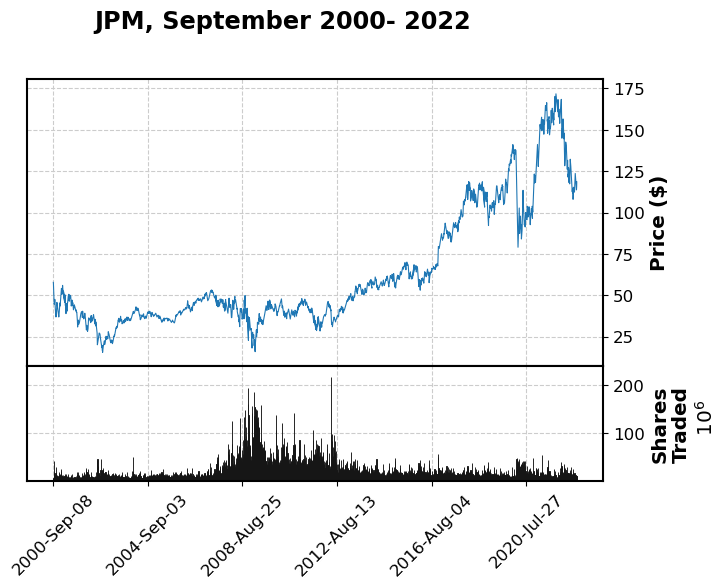

In [78]:
fplt.plot(  JPM_data,
            type='line',
           
            title ='JPM, September 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
            )

Text(0.5, 1.0, ' JP Morgan Log Returns')

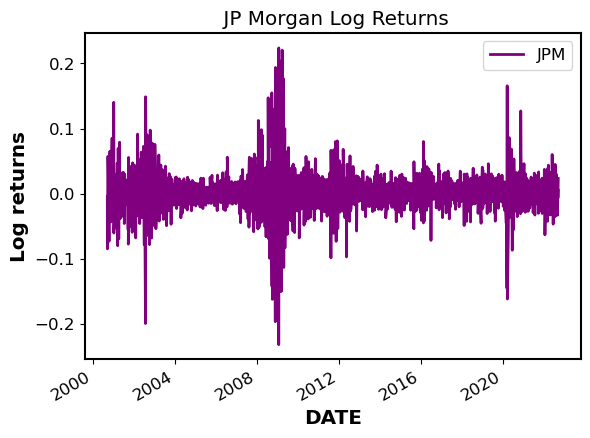

In [23]:
JPM_logret.plot(color='Purple')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['JPM'])
plt.title(' JP Morgan Log Returns')

# SCHW 

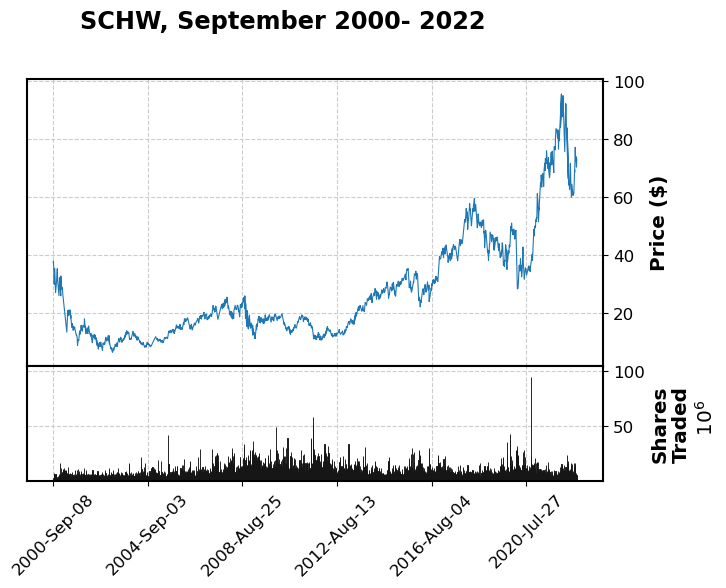

In [24]:
fplt.plot(  SCHW_data,
            type='line',  #candle
            title='SCHW, September 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
        )

Text(0.5, 1.0, 'Charles Schwab Corporation Log Returns')

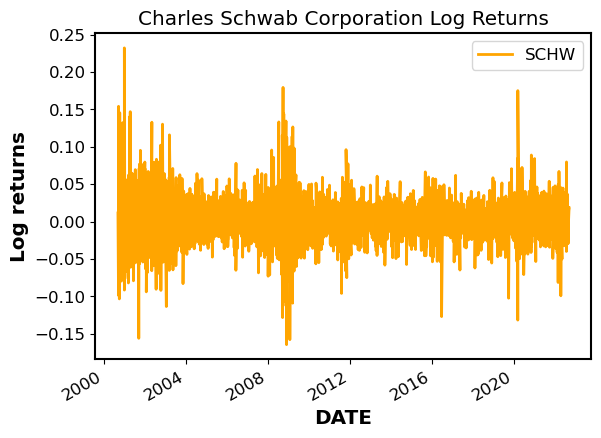

In [25]:
SCHW_logret.plot(color='Orange')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['SCHW'])
plt.title('Charles Schwab Corporation Log Returns')

# Goldman Sachs (GS)

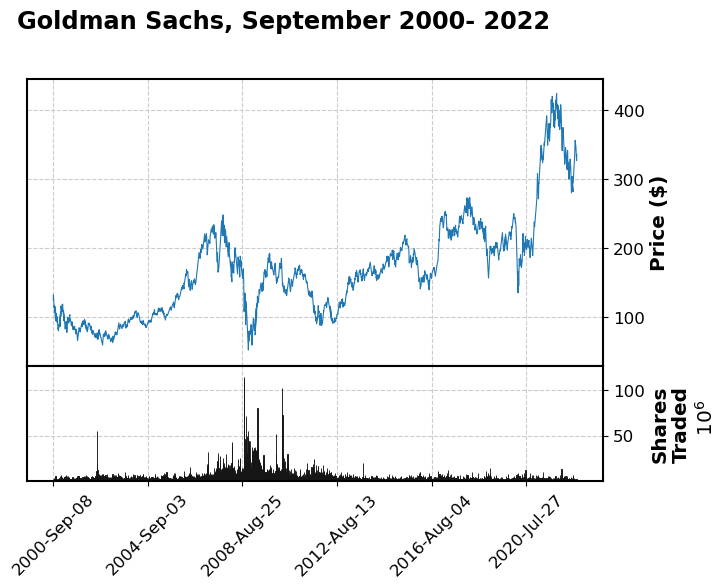

In [26]:
fplt.plot(  GS_data,
            type='line',  #candle
            title='Goldman Sachs, September 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
        )

Text(0.5, 1.0, ' Goldman Sachs Log Returns')

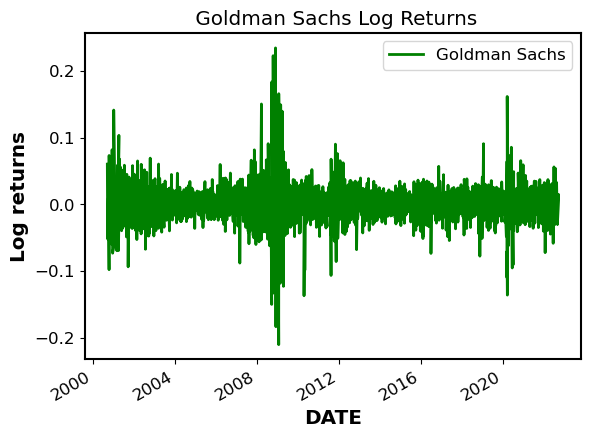

In [27]:
GS_logret.plot(color='Green')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['Goldman Sachs'])
plt.title(' Goldman Sachs Log Returns')

# Wells Fargo Bank (WFC)

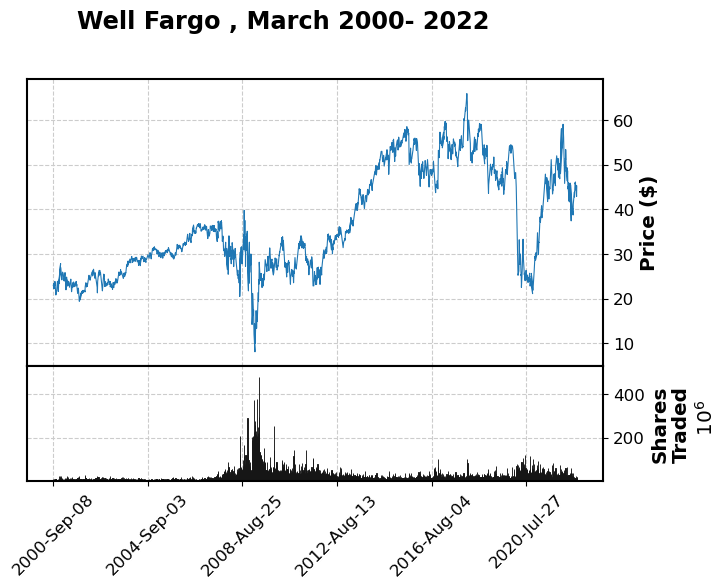

In [28]:
fplt.plot(  WFC_data,
            type='line',  #candle
            title='Well Fargo , March 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
        )

Text(0.5, 1.0, ' Well Fargo Log Returns')

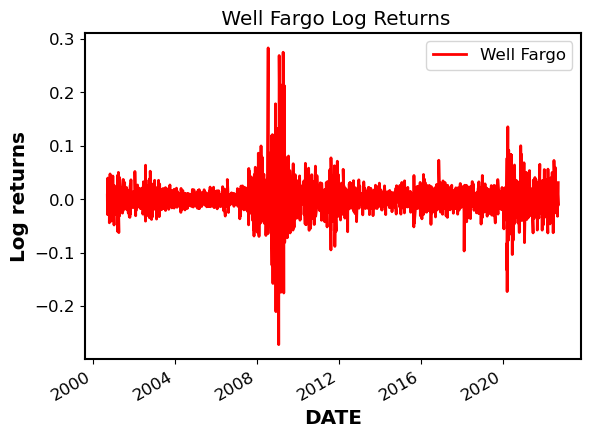

In [29]:
WFC_logret.plot(color='red')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['Well Fargo'])
plt.title(' Well Fargo Log Returns')

# Bank Of America (BAC)

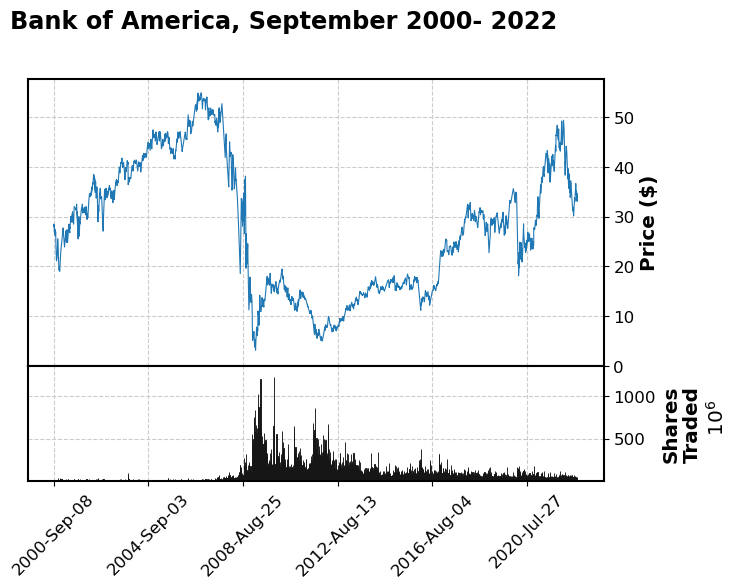

In [30]:
fplt.plot(  BAC_data,
            type='line',  #candle
            title='Bank of America, September 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
        )

Text(0.5, 1.0, ' Bank of America Log Returns')

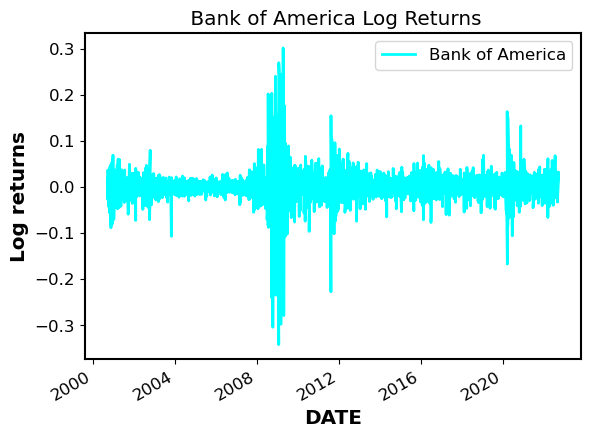

In [31]:
BAC_logret.plot(color='cyan')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['Bank of America'])
plt.title(' Bank of America Log Returns')

# Morgan Stanley (MS)

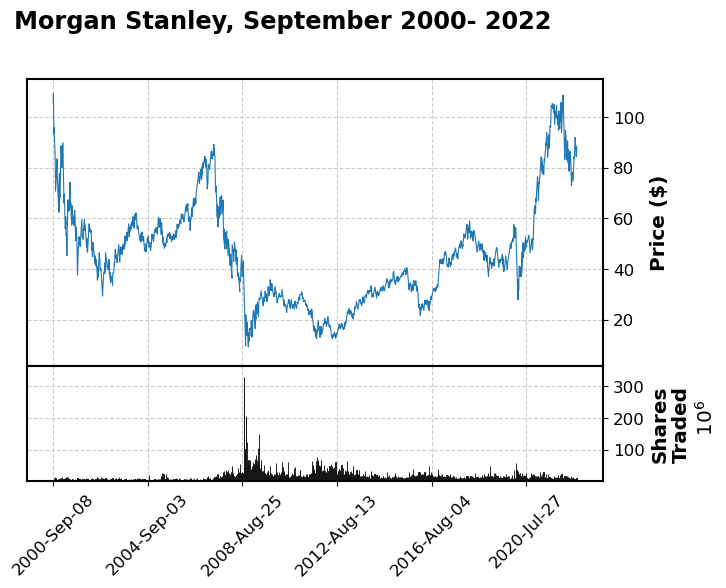

In [32]:
fplt.plot(  MS_data,
            type='line',  #candle
            title='Morgan Stanley, September 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
        )

Text(0.5, 1.0, ' Morgan Stanley Log Returns')

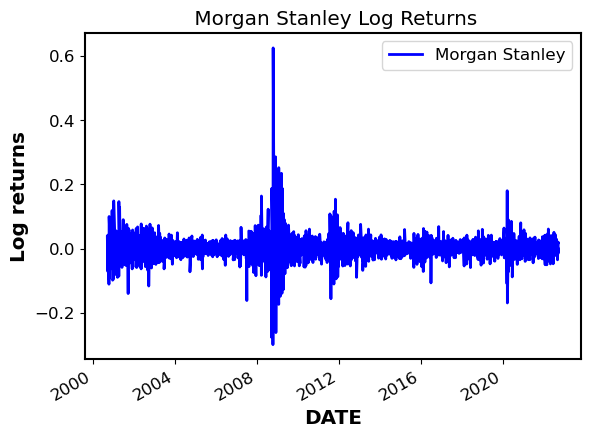

In [33]:
MS_logret.plot(color='blue')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['Morgan Stanley'])
plt.title(' Morgan Stanley Log Returns')

# SP500 (^GSP)

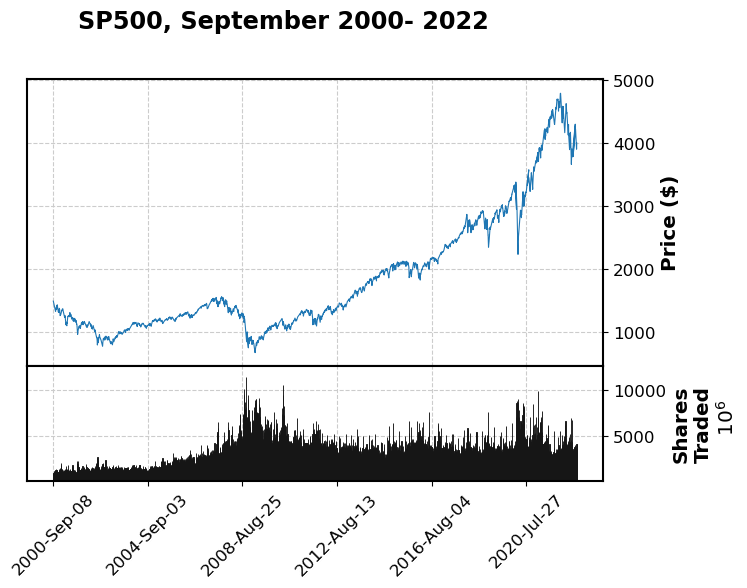

In [34]:
fplt.plot(  SP500_data,
            type='line',  #candle
            title='SP500, September 2000- 2022',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            #mav=2,
            #figscale=1,
            style='classic'
        )

Text(0.5, 1.0, ' SP500 Log Returns')

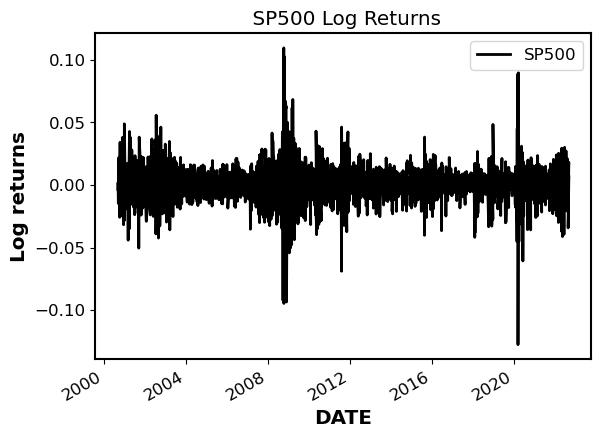

In [35]:
SP500_logret.plot(color='black')
plt.ylabel('Log returns')
plt.grid()
plt.xlabel('DATE')
plt.legend( ['SP500'])
plt.title(' SP500 Log Returns')

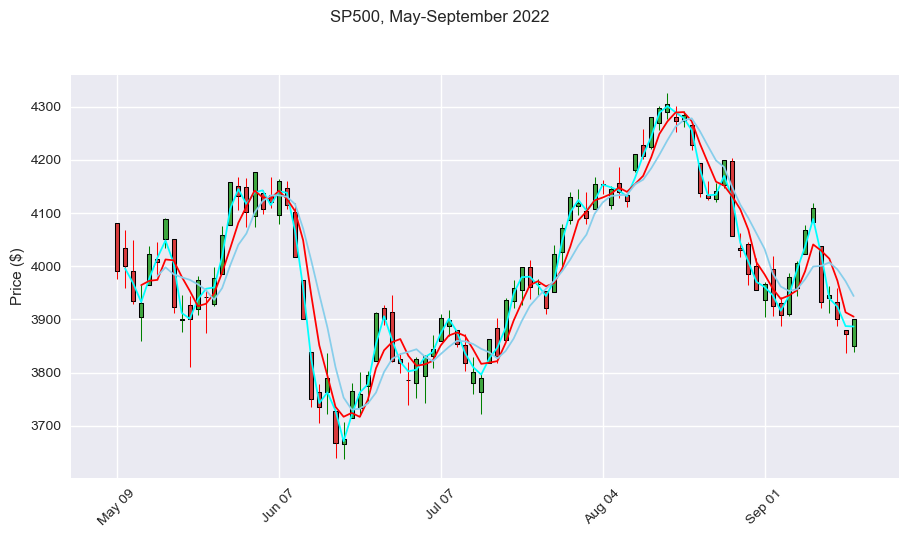

In [36]:
mc = fplt.make_marketcolors(
                            up='tab:green',down='tab:red',
                            edge='black',
                            wick={'up':'green','down':'red'},
                            volume='black',
                           )

s  = fplt.make_mpf_style(base_mpl_style="seaborn", marketcolors=mc, mavcolors=["cyan","red","skyblue"])

fplt.plot(
        SP500_data_2022,
        type="candle",
        title='SP500, May-September 2022',
        ylabel='Price ($)',
        mav=(2,4,6),
        figratio=(12,6),
        style=s
    )

DATA SHOW 

In [37]:
#Data.plot(subplots=True, figsize=(16,14));
#plt.title("Stock price");

In [38]:
#Data_logret.plot(subplots=True, figsize=(16,14))
#plt.title("Log Returns");

<AxesSubplot:xlabel='Date'>

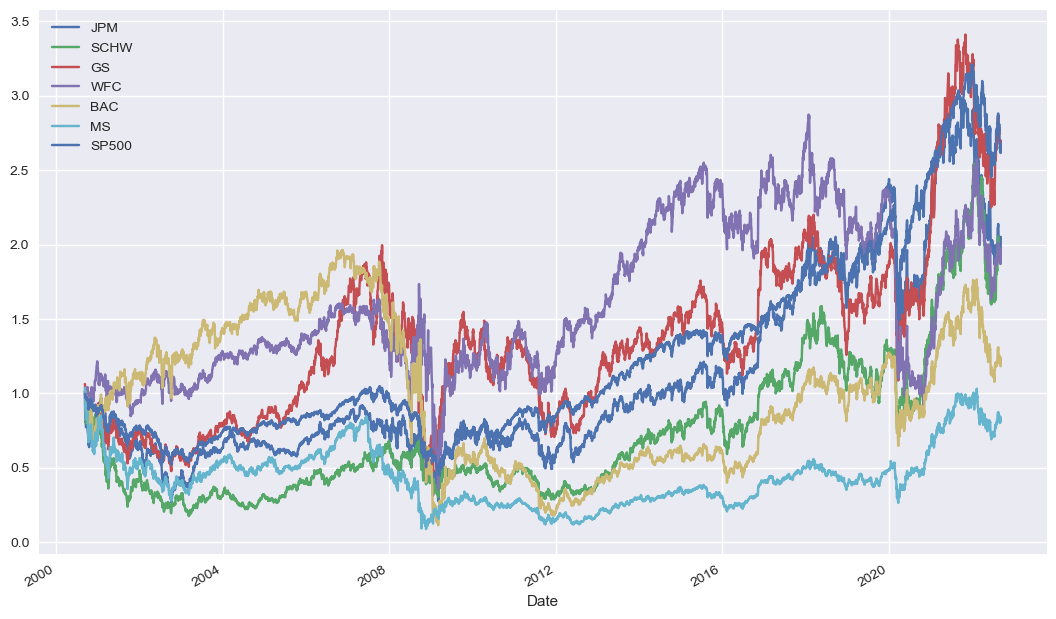

In [39]:
Data_logret.cumsum().apply(np.exp).plot(figsize=(13,8))  #Cumulative log returns over time

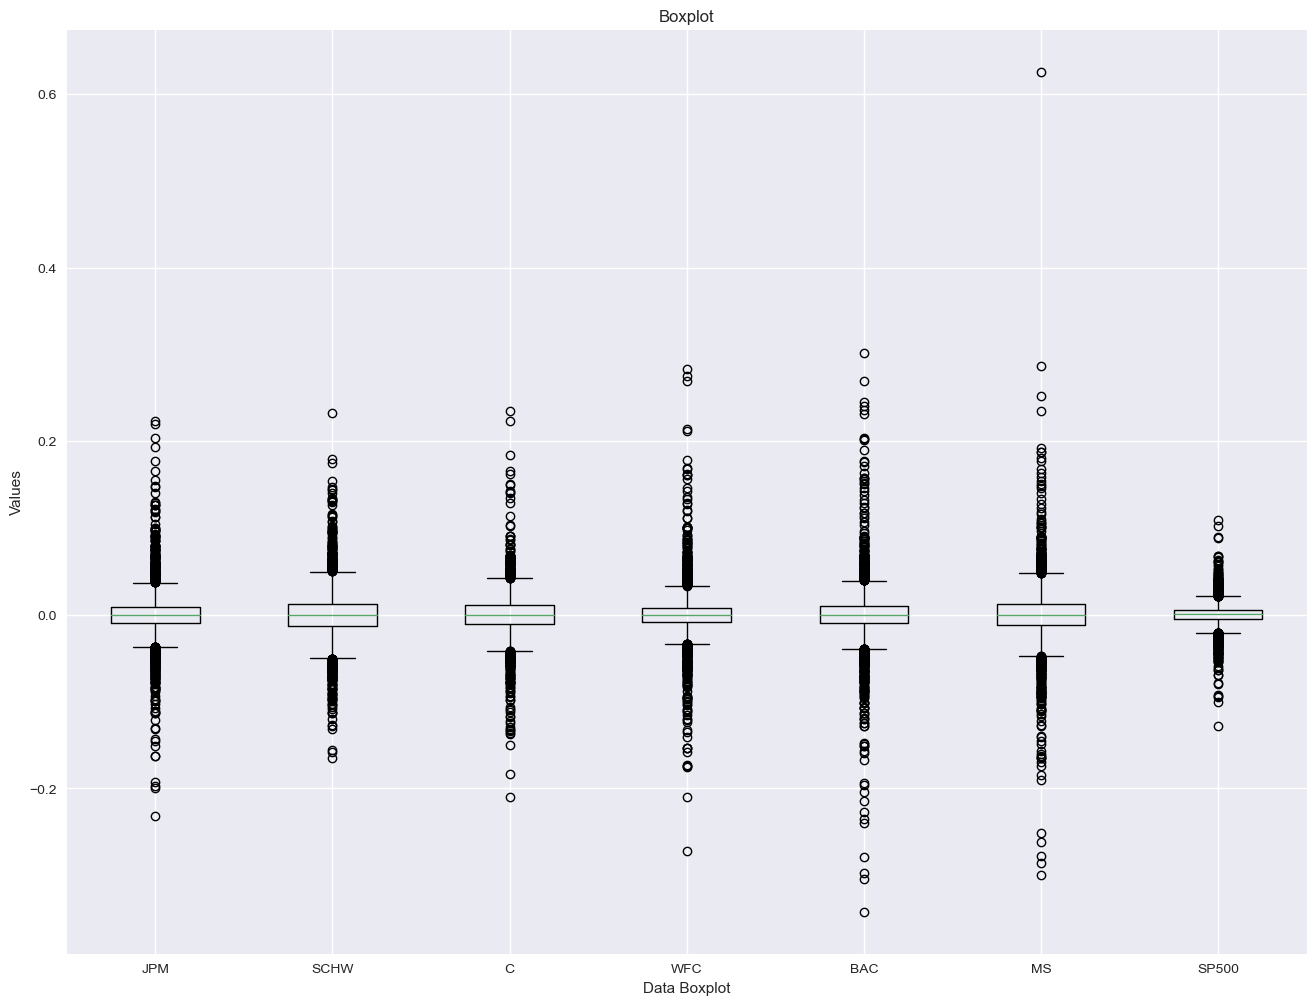

In [40]:
fig, ax = plt.subplots(figsize=(16,12))
plt.boxplot(Data_logret);
plt.setp(ax, xticklabels = ['JPM', 'SCHW', 'C', 'WFC','BAC','MS','SP500'])
plt.xlabel('Data Boxplot')
plt.ylabel('Values')
plt.title('Boxplot');

<AxesSubplot:>

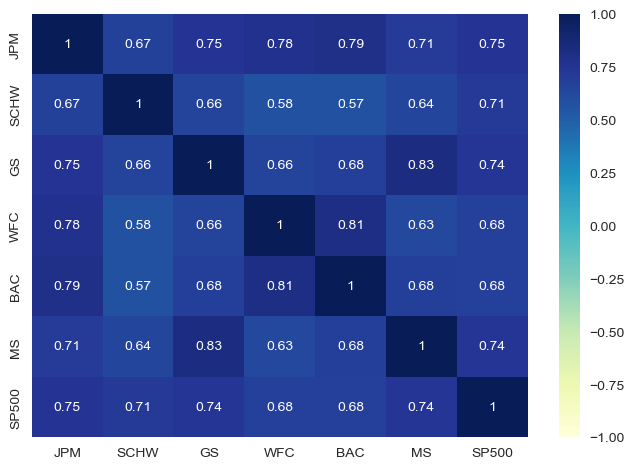

In [41]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
# Correlation Matrix formation
corr_matrix = Data_logret.corr()
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix,vmax=1, vmin=-1, center=0, annot=True,cmap='YlGnBu')

FEDFUNDS

In [42]:
Fedfunds:pd.DataFrame=pd.read_excel('/Users/niccolomassoni/Desktop/FEDFUNDS2000-2022.xlsx', index_col='date')
Fedfunds.head()

,FED FUNDS
date,
2000-09-09,6.50
2000-09-10,6.50
2000-09-11,6.50
2000-09-12,6.47
2000-09-13,6.47


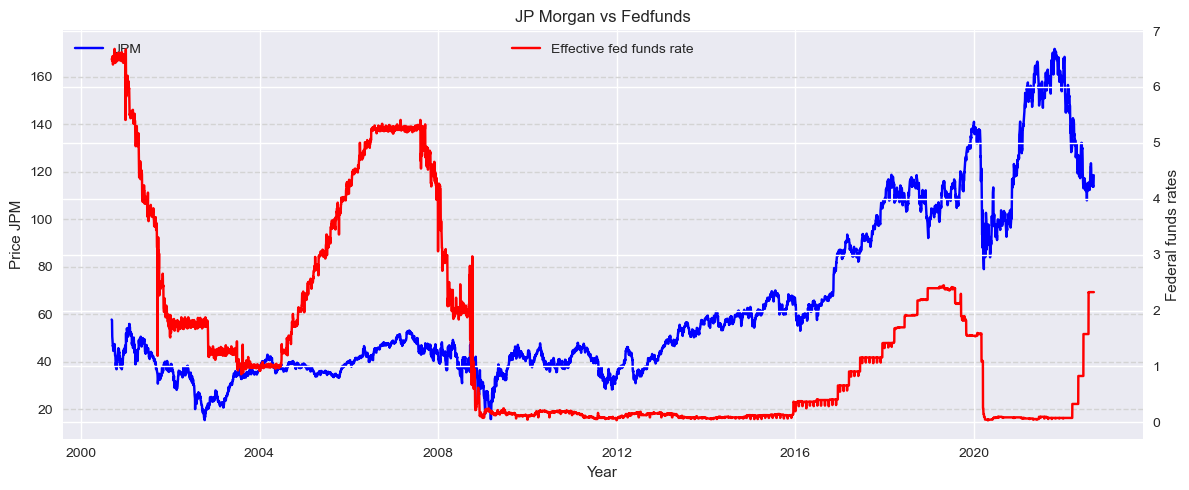

In [43]:
fig, ax = plt.subplots(figsize=(12,5)) #comparison between ARKK and Federal funds
ax2 = ax.twinx()
ax.set_title('JP Morgan vs Fedfunds')
ax.set_xlabel('Year')
ax.plot(JPM, color='blue')
ax2.plot(Fedfunds, color='red')
ax.set_ylabel('Price JPM')
ax2.set_ylabel('Federal funds rates')
ax.legend(['JPM'])
ax2.legend(['Effective fed funds rate'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

Bank of America vs FED funds

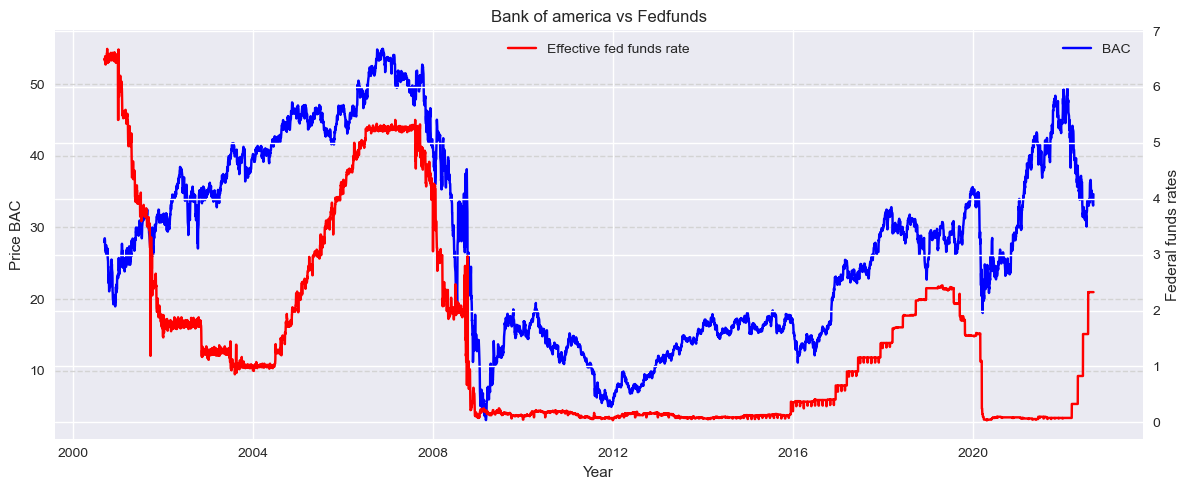

In [44]:
fig, ax = plt.subplots(figsize=(12,5)) 
ax2 = ax.twinx()
ax.set_title('Bank of america vs Fedfunds')
ax.set_xlabel('Year')
ax.plot(BAC, color='blue')
ax2.plot(Fedfunds, color='red')
ax.set_ylabel('Price BAC')
ax2.set_ylabel('Federal funds rates')
ax.legend(['BAC'])
ax2.legend(['Effective fed funds rate'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

Morgan Stanley vs FED funds

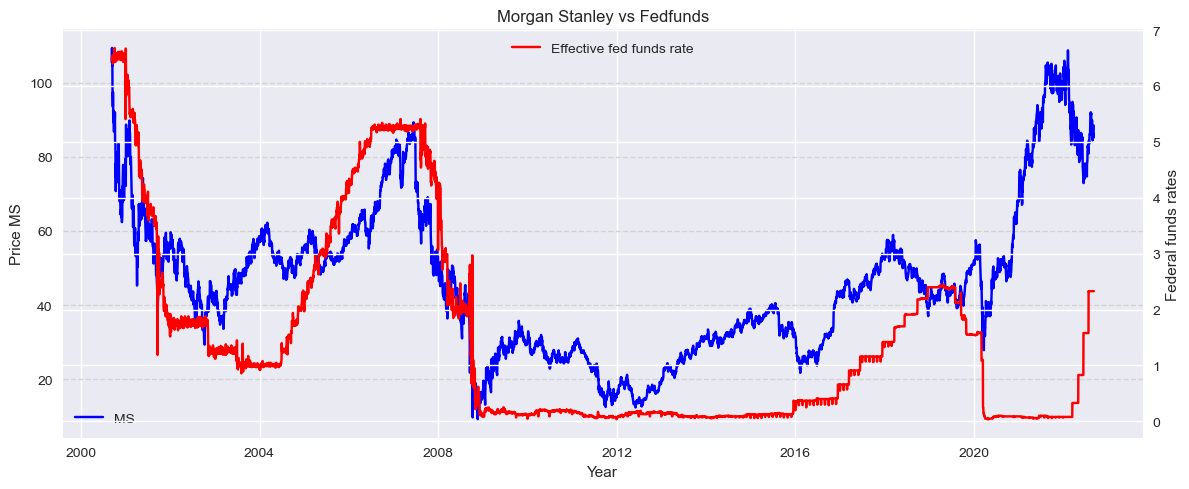

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Morgan Stanley vs Fedfunds')
ax.set_xlabel('Year')
ax.plot(MS, color='blue')
ax2.plot(Fedfunds, color='red')
ax.set_ylabel('Price MS')
ax2.set_ylabel('Federal funds rates')
ax.legend(['MS'])
ax2.legend(['Effective fed funds rate'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

Well Fargo and FED funds

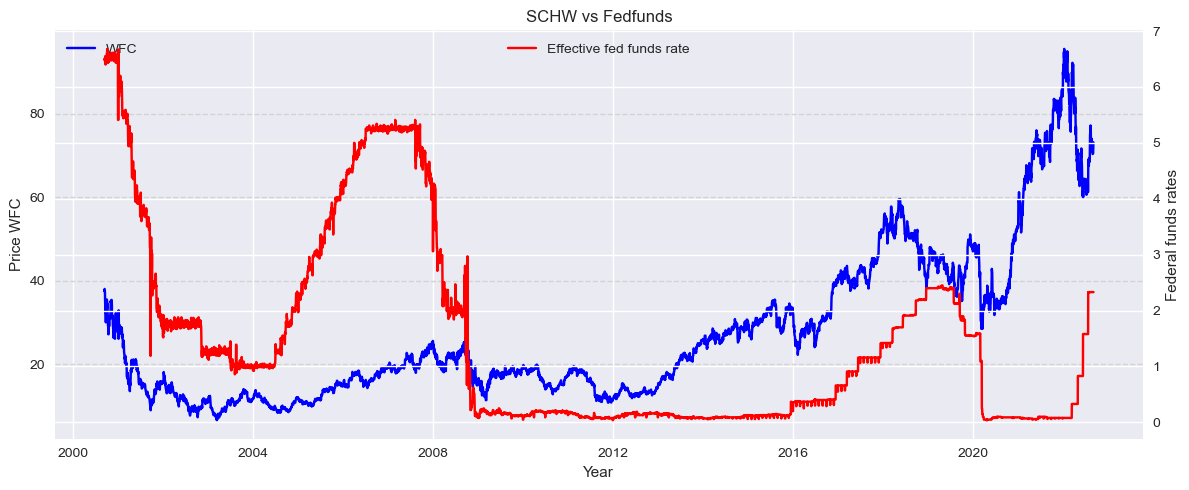

In [46]:
fig, ax = plt.subplots(figsize=(12,5)) 
ax2 = ax.twinx()
ax.set_title('SCHW vs Fedfunds')
ax.set_xlabel('Year')
ax.plot(SCHW, color='blue')
ax2.plot(Fedfunds, color='red')
ax.set_ylabel('Price WFC')
ax2.set_ylabel('Federal funds rates')
ax.legend(['WFC'])
ax2.legend(['Effective fed funds rate'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

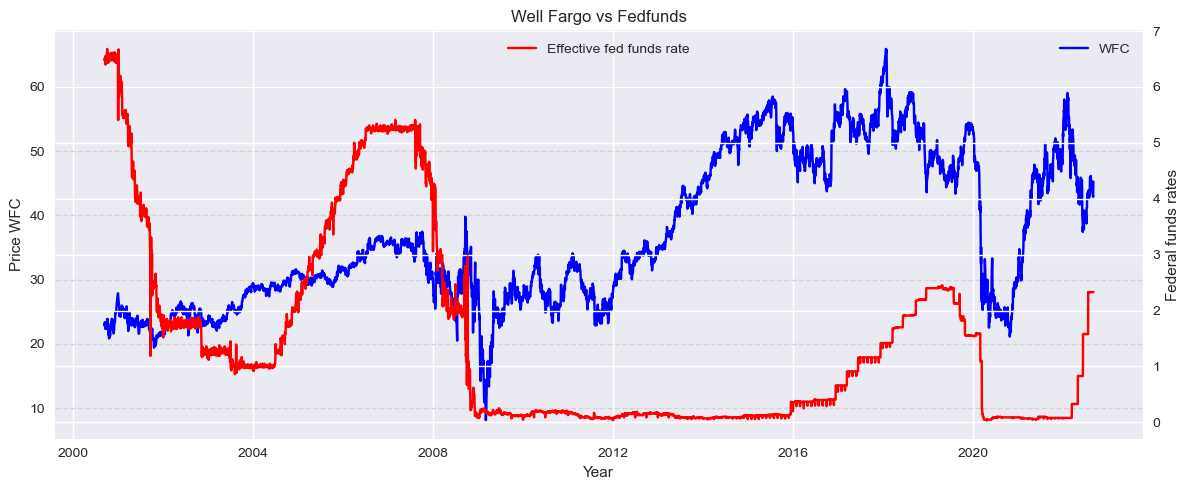

In [47]:
fig, ax = plt.subplots(figsize=(12,5)) 
ax2 = ax.twinx()
ax.set_title('Well Fargo vs Fedfunds')
ax.set_xlabel('Year')
ax.plot(WFC, color='blue')
ax2.plot(Fedfunds, color='red')
ax.set_ylabel('Price WFC')
ax2.set_ylabel('Federal funds rates')
ax.legend(['WFC'])
ax2.legend(['Effective fed funds rate'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

Goldman Sachs (GS)

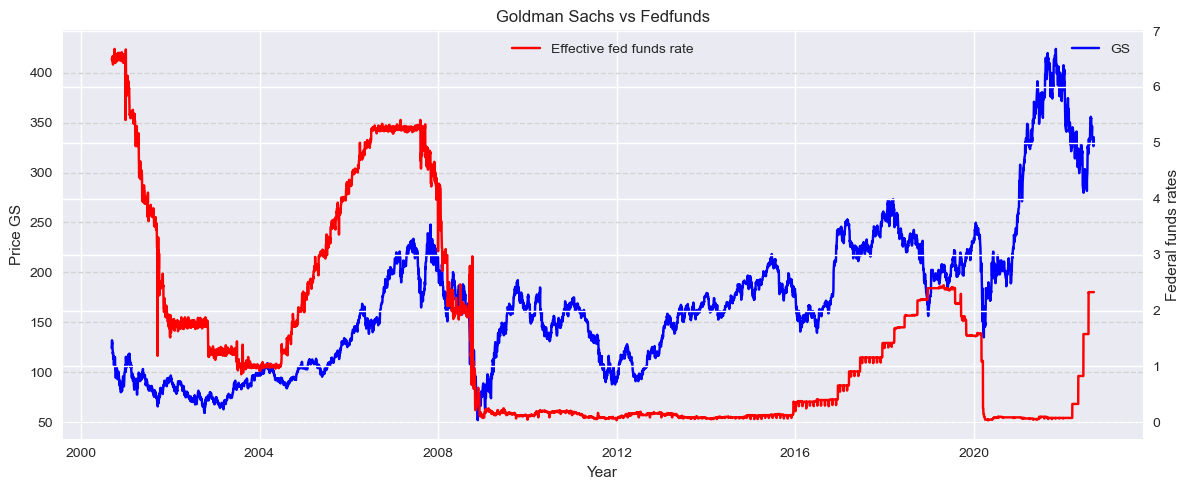

In [48]:
fig, ax = plt.subplots(figsize=(12,5)) 
ax2 = ax.twinx()
ax.set_title('Goldman Sachs vs Fedfunds')
ax.set_xlabel('Year')
ax.plot(GS, color='blue')
ax2.plot(Fedfunds, color='red')
ax.set_ylabel('Price GS')
ax2.set_ylabel('Federal funds rates')
ax.legend(['GS'])
ax2.legend(['Effective fed funds rate'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

Regression JPM

In [49]:
X=pd.concat([Fedfunds,JPM_logret],join='inner',axis=1)
X.dropna()

,FED FUNDS,JPM
2000-09-11,6.50,-0.005420
2000-09-12,6.47,-0.085037
2000-09-13,6.47,-0.041069
2000-09-14,6.50,-0.013656
2000-09-15,6.55,-0.017655
...,...,...
2022-09-01,2.33,0.006835
2022-09-02,2.33,-0.007011
2022-09-06,2.33,0.000264
2022-09-07,2.33,0.018813


In [50]:
len(Fedfunds)

8036

In [51]:
len(JPM_logret)

5534

In [52]:
data=pd.concat([JPM_logret,Fedfunds],join='inner',axis=1) # the use of pd.concst allow us to define the correct len
#of the two variables
data.head()

,JPM,FED FUNDS
2000-09-11,-0.005420,6.50
2000-09-12,-0.085037,6.47
2000-09-13,-0.041069,6.47
2000-09-14,-0.013656,6.50
2000-09-15,-0.017655,6.55


In [53]:
X=data.loc[:,['FED FUNDS']]
X['constant']=1 # i define the matrix of the explanatory variables

In [54]:
X.head() 

,FED FUNDS,constant
2000-09-11,6.50,1
2000-09-12,6.47,1
2000-09-13,6.47,1
2000-09-14,6.50,1
2000-09-15,6.55,1


In [55]:
Y=data.loc[:,['JPM']]
Y.head()

,JPM
2000-09-11,-0.005420
2000-09-12,-0.085037
2000-09-13,-0.041069
2000-09-14,-0.013656
2000-09-15,-0.017655


In [56]:
#calcolo il beta OLS
coeffs: pd.DataFrame=np.linalg.inv(X.transpose() @ X) @ X.transpose() @ Y

In [57]:
coeffs.index=X.columns
coeffs.head()

,JPM
FED FUNDS,-0.000170
constant,0.000381


In [58]:
Y_hat=X@coeffs
Y_hat.head()

,JPM
2000-09-11,-0.000725
2000-09-12,-0.000720
2000-09-13,-0.000720
2000-09-14,-0.000725
2000-09-15,-0.000733


<Figure size 800x550 with 0 Axes>

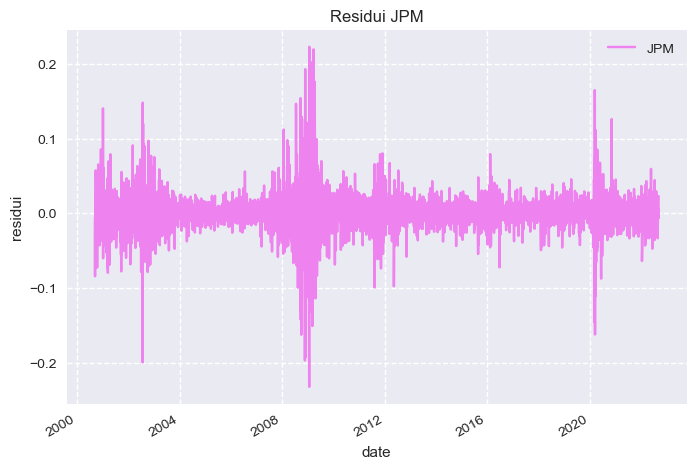

In [59]:
residual = data.loc[:, ['JPM']] - Y_hat
plt.figure() 
residual.plot(color="violet") 
plt.xlabel("date") 
plt.ylabel("residui") 
plt.grid(linestyle='dashed')
plt.title('Residui JPM')
plt.show()


In [60]:
residual.head()

,JPM
2000-09-11,-0.004695
2000-09-12,-0.084317
2000-09-13,-0.040349
2000-09-14,-0.012932
2000-09-15,-0.016922


In [61]:
# Total sum of squares
TSS = ((Y-np.mean(Y)).transpose() @ (Y-np.mean(Y)))
# Estimated sum of squares
ESS= ((Y_hat-np.mean(Y)).transpose() @ (Y_hat-np.mean(Y)))
# Residual sum of squares 
RSS = (residual.transpose() @ residual)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [62]:
min_square_info=pd.concat([TSS,ESS,RSS],join='inner',axis=1)
min_square_info.columns=['TSS','ESS','RSS']
min_square_info.head()

,TSS,ESS,RSS
JPM,3.192563,0.00047,3.192094


In [63]:
R_2 = ESS/TSS
R_2.columns=['R square']
R_2.head()

,R square
JPM,0.000147


In [64]:
min_square_info=pd.concat([TSS,ESS,RSS,R_2],join='inner',axis=1)
min_square_info.head()

,JPM,JPM,JPM,R square
JPM,3.192563,0.00047,3.192094,0.000147


In [69]:
import numpy as np
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

In [70]:
print("mean : ", np.mean(JPM_logret))
print("var  : ", np.var(JPM_logret))
print("skew : ",skew(JPM_logret))
print("kurt : ",kurtosis(JPM_logret))

mean :  JPM    0.00013
dtype: float64
var  :  JPM    0.000577
dtype: float64
skew :  [0.22613178]
kurt :  [14.64691859]


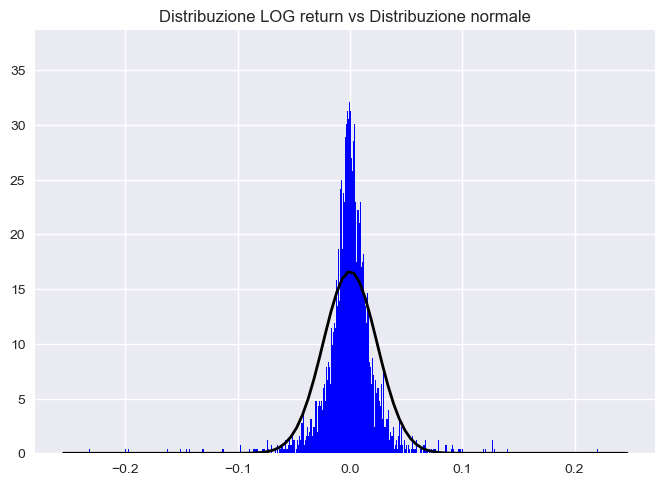

In [71]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
# Fit a normal distribution to # the data:
# mean and standard deviation mu, std = norm.fit(data)
# Plot the histogram.
std_JPM=np.std(JPM_logret)
mean_JPM=np.mean(JPM_logret)
plt.hist(JPM_logret, bins=1000, density=True, alpha=1, color='blue')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_JPM, std_JPM)
plt.plot(x, p, 'k', linewidth=2)
title = 'Distribuzione LOG return vs Distribuzione normale'
plt.title(title)
plt.show()